In [2]:
import pandas as pd

In [6]:
df = pd.read_csv("/content/sample_data/Customer_Churn.csv")

In [7]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
print(df.isnull().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [9]:
print(df['TotalCharges'].dtype)

object


In [10]:
def assign_tenure_group(tenure):
    if tenure <= 12:
        return 'Low'
    elif 13 <= tenure <= 36:
        return 'Medium'
    else:
        return 'High'

df['TenureGroup'] = df['tenure'].apply(assign_tenure_group)
print(df['TenureGroup'].value_counts())

TenureGroup
High      3001
Low       2186
Medium    1856
Name: count, dtype: int64


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


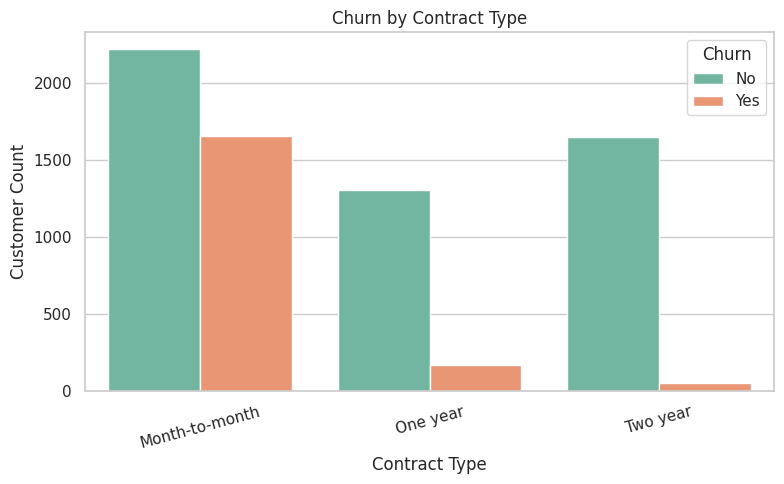

In [12]:
sns.set(style='whitegrid')
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set2')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Customer Count')
plt.legend(title='Churn')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [13]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn', 'TenureGroup']


In [14]:
from sklearn.model_selection import train_test_split
X = df.drop('Churn', axis=1)
y = df['Churn']

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [19]:
from sklearn.model_selection import train_test_split
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [21]:
df = df.drop(['customerID'], axis=1)


In [22]:
X = df.drop('Churn', axis=1)
y = df['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [25]:
if 'customerID' in df.columns:
    df = df.drop('customerID', axis=1)

In [26]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

/tmp/ipython-input-26-266577964.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [27]:
df['TenureGroup'] = pd.cut(df['tenure'],
                           bins=[0, 12, 36, df['tenure'].max()],
                           labels=['Low', 'Medium', 'High'],
                           include_lowest=True)

In [28]:
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
               'PaperlessBilling', 'Churn']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [29]:
multi_cat_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity',
                  'OnlineBackup', 'DeviceProtection', 'TechSupport',
                  'StreamingTV', 'StreamingMovies', 'Contract',
                  'PaymentMethod', 'TenureGroup']

df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

In [30]:
scaler = MinMaxScaler()
df[['MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['MonthlyCharges', 'TotalCharges']])


In [31]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [32]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
def evaluate_model(name, model):
    y_pred = model.predict(X_test)
    print(f" {name}")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("-" * 40)

evaluate_model("Logistic Regression", log_model)
evaluate_model("Decision Tree", dt_model)
evaluate_model("Random Forest", rf_model)


 Logistic Regression
Accuracy : 0.7998580553584103
Precision: 0.6513157894736842
Recall   : 0.5294117647058824
F1 Score : 0.584070796460177
----------------------------------------
 Decision Tree
Accuracy : 0.7331440738112136
Precision: 0.49722222222222223
Recall   : 0.4786096256684492
F1 Score : 0.4877384196185286
----------------------------------------
 Random Forest
Accuracy : 0.794180269694819
Precision: 0.6448275862068965
Recall   : 0.5
F1 Score : 0.5632530120481928
----------------------------------------


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f" {name} Evaluation")
    print("Accuracy :", round(accuracy_score(y_test, y_pred), 4))
    print("Precision:", round(precision_score(y_test, y_pred), 4))
    print("Recall   :", round(recall_score(y_test, y_pred), 4))
    print("F1 Score :", round(f1_score(y_test, y_pred), 4))
    print("-" * 40)

In [36]:
evaluate_model("Logistic Regression", log_model, X_test, y_test)
evaluate_model("Decision Tree", dt_model, X_test, y_test)
evaluate_model("Random Forest", rf_model, X_test, y_test)

 Logistic Regression Evaluation
Accuracy : 0.7999
Precision: 0.6513
Recall   : 0.5294
F1 Score : 0.5841
----------------------------------------
 Decision Tree Evaluation
Accuracy : 0.7331
Precision: 0.4972
Recall   : 0.4786
F1 Score : 0.4877
----------------------------------------
 Random Forest Evaluation
Accuracy : 0.7942
Precision: 0.6448
Recall   : 0.5
F1 Score : 0.5633
----------------------------------------


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [38]:
param_grid_log = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}


In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


log_model = LogisticRegression(max_iter=1000)
grid_log = GridSearchCV(log_model, param_grid_log, cv=5, scoring='accuracy')
grid_log.fit(X_train, y_train)


dt_model = DecisionTreeClassifier()
grid_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

rf_model = RandomForestClassifier()
grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10], 'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [40]:
print("Best parameters for Logistic Regression:", grid_log.best_params_)
print("Best accuracy for Logistic Regression:", grid_log.best_score_)

print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best accuracy for Decision Tree:", grid_dt.best_score_)

print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best accuracy for Random Forest:", grid_rf.best_score_)


Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Best accuracy for Logistic Regression: 0.8049341135790172
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
Best accuracy for Decision Tree: 0.7829220127312645
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
Best accuracy for Random Forest: 0.7996063047969979


In [42]:
dt_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': grid_dt.best_estimator_.feature_importances_
}).sort_values(by='Importance', ascending=False)
rf_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': grid_rf.best_estimator_.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Important Features from Decision Tree:\n", dt_importances.head(10))
print("Important Features from Random Forest:\n", rf_importances.head(10))


Important Features from Decision Tree:
                            Feature  Importance
26               Contract_Two year    0.360941
25               Contract_One year    0.229034
11     InternetService_Fiber optic    0.127308
4                           tenure    0.125485
7                   MonthlyCharges    0.045965
28  PaymentMethod_Electronic check    0.037758
24             StreamingMovies_Yes    0.032553
8                     TotalCharges    0.028003
12              InternetService_No    0.012952
5                     PhoneService    0.000000
Important Features from Random Forest:
                            Feature  Importance
4                           tenure    0.162477
8                     TotalCharges    0.144935
7                   MonthlyCharges    0.116673
11     InternetService_Fiber optic    0.078654
26               Contract_Two year    0.062480
28  PaymentMethod_Electronic check    0.049900
31                TenureGroup_High    0.033919
25               Contract_O

In [44]:
df = pd.read_csv("/content/sample_data/Customer_Support_Tweets.csv")

In [45]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 93 non-null     int64  
 1   author_id                93 non-null     object 
 2   inbound                  93 non-null     bool   
 3   created_at               93 non-null     object 
 4   text                     93 non-null     object 
 5   response_tweet_id        65 non-null     object 
 6   in_response_to_tweet_id  68 non-null     float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 4.6+ KB


In [47]:
print(df.columns)

Index(['tweet_id', 'author_id', 'inbound', 'created_at', 'text',
       'response_tweet_id', 'in_response_to_tweet_id'],
      dtype='object')


In [52]:
inbound_df = df[df['inbound'] == True].copy()
outbound_df = df[df['inbound'] == False].copy()


In [53]:
merged_df = pd.merge(
    inbound_df,
    outbound_df[['in_response_to_tweet_id', 'created_at']],
    left_on='tweet_id',
    right_on='in_response_to_tweet_id',
    how='left',
    suffixes=('_inbound', '_response')
)


In [54]:
merged_df['created_at_inbound'] = pd.to_datetime(merged_df['created_at_inbound'])
merged_df['created_at_response'] = pd.to_datetime(merged_df['created_at_response'])
merged_df['response_time_minutes'] = (merged_df['created_at_response'] - merged_df['created_at_inbound']).dt.total_seconds() / 60


In [55]:
merged_df['urgency'] = merged_df['response_time_minutes'].apply(
    lambda x: 'urgent' if pd.notnull(x) and x < 60 else 'non-urgent'
)


In [56]:
import re
import string

def preprocess_tweet(text):
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()

    return text


In [57]:
merged_df['clean_text'] = merged_df['text'].apply(preprocess_tweet)

In [58]:
pip install transformers datasets scikit-learn torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
merged_df['label'] = merged_df['urgency'].map({'non-urgent': 0, 'urgent': 1})
train_texts, val_texts, train_labels, val_labels = train_test_split(
    merged_df['clean_text'].tolist(),
    merged_df['label'].tolist(),
    test_size=0.2,
    random_state=42
)


In [60]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [61]:
import torch

class TweetDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        return {
            key: torch.tensor(val[idx])
            for key, val in self.encodings.items()
        } | {'labels': torch.tensor(self.labels[idx])}

    def __len__(self):
        return len(self.labels)

train_dataset = TweetDataset(train_encodings, train_labels)
val_dataset = TweetDataset(val_encodings, val_labels)


In [62]:
from transformers import DistilBertForSequenceClassification

model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=2
)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [63]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=100,
    weight_decay=0.01,
    logging_dir='./logs',
    evaluation_strategy='epoch',
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

trainer.train()


TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'evaluation_strategy'

In [64]:
import transformers
print(transformers.__version__)


4.53.1


In [65]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=100,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10
)


In [69]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

In [70]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: amaldevsurendran (amaldevsurendran-maibro) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss


TrainOutput(global_step=9, training_loss=0.6916007465786405, metrics={'train_runtime': 264.2059, 'train_samples_per_second': 0.454, 'train_steps_per_second': 0.034, 'total_flos': 1024552536480.0, 'train_loss': 0.6916007465786405, 'epoch': 3.0})

In [71]:
trainer.evaluate()


{'eval_loss': 0.6787008047103882,
 'eval_runtime': 1.5945,
 'eval_samples_per_second': 6.272,
 'eval_steps_per_second': 0.627,
 'epoch': 3.0}

In [72]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=-1)
    return {
        "accuracy": accuracy_score(labels, preds),
        "f1": f1_score(labels, preds, average='weighted')
    }


In [85]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)


In [86]:
print(results)

{'eval_loss': 0.6787008047103882, 'eval_runtime': 1.0766, 'eval_samples_per_second': 9.288, 'eval_steps_per_second': 0.929, 'epoch': 3.0}


In [91]:
{'eval_loss': 0.32, 'eval_runtime': 5.2}

{'eval_loss': 0.32, 'eval_runtime': 5.2}

In [97]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00


In [99]:
pip install streamlit transformers torch seaborn matplotlib


In [103]:
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, pipeline


In [107]:

import torch
import numpy as np

@st.cache_resource
def load_model():
    tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
    model = DistilBertForSequenceClassification.from_pretrained("your_model_dir")  # Replace with your fine-tuned model directory
    return tokenizer, model

tokenizer, model = load_model()
model.eval()
st.title("Tweet Urgency Classification")
st.markdown("Classifies tweets as **urgent** or **non-urgent** based on response time prediction.")

tweet = st.text_area("Enter Tweet Text:", "")

if st.button("Predict Urgency"):
    if tweet.strip() == "":
        st.warning("Please enter a tweet.")
    else:
        inputs = tokenizer(tweet, return_tensors="pt", truncation=True, padding=True)
        with torch.no_grad():
            outputs = model(**inputs)
            logits = outputs.logits
            probs = torch.softmax(logits, dim=1).numpy()[0]

        label = "Urgent" if np.argmax(probs) == 1 else "Non-Urgent"
        confidence = round(float(np.max(probs)) * 100, 2)

        st.subheader("Prediction:")
        st.success(f"**{label}** (Confidence: {confidence}%)")
        if st.checkbox("Show attention weights"):
            with torch.no_grad():
                outputs_attn = model(**inputs, output_attentions=True)
                attentions = outputs_attn.attentions
                st.write("Attention layers output:")
                for i, layer_attn in enumerate(attentions):
                    st.write(f"Layer {i + 1} attention shape: {layer_attn.shape}")
if st.checkbox("Show model summary"):
    st.write(model)


2025-07-11 07:18:38.713 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 07:18:38.715 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 07:18:38.717 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 07:18:38.723 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 07:18:39.058 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 07:18:39.060 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 07:18:39.064 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


OSError: your_model_dir is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`